In [1]:
# import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams["figure.dpi"] = 150
import seaborn as sns
import os

# enable copy on write (default in pandas 3.0)
pd.options.mode.copy_on_write = True

In [2]:
power_2023 = pd.read_excel('../power_data/2023_Annual_Summary.xls', skiprows=1, parse_dates=['Date Event Began', 'Date of Restoration'])
power_2023 = power_2023[power_2023['Event Type'].str.contains(r'Severe Weather', regex=True)]
weather_2023 = pd.read_csv('../weather_data/cleaned/tvs-2023.csv', parse_dates=['DATE'])

WARNING *** file size (117444) not 512 + multiple of sector size (512)


### Check the yearly distribution of power outages and tornado events

ConversionError: Failed to convert value(s) to axis units: array(['2023-01-01T00:00:00.000000000', '2023-01-01T00:00:00.000000000',
       '2023-01-01T00:00:00.000000000', ...,
       '2023-12-30T00:00:00.000000000', '2023-12-30T00:00:00.000000000',
       '2023-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

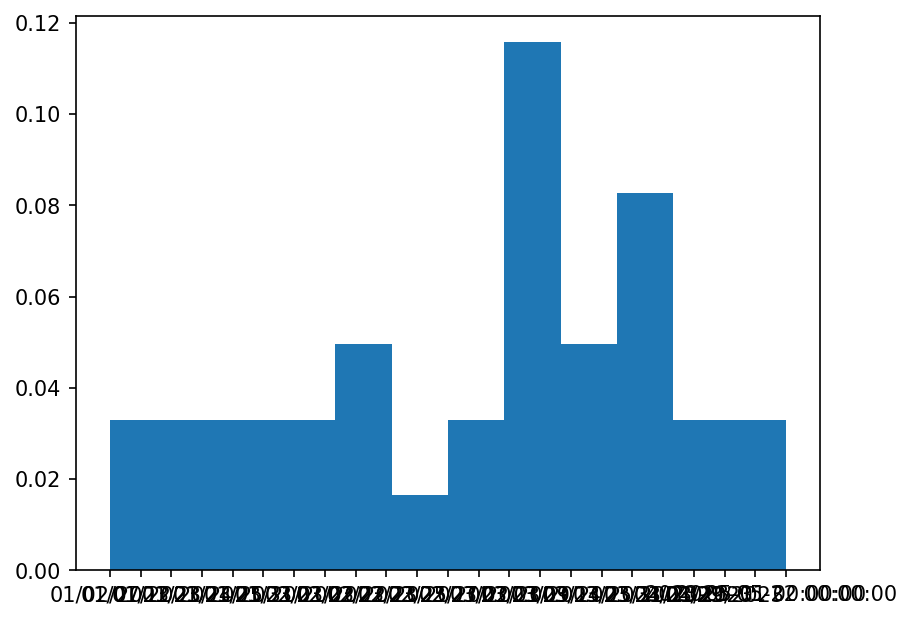

In [3]:
plt.hist(power_2023['Date Event Began'], bins=12, density=True, label='Power outages')
plt.hist(weather_2023['DATE'], bins=12, alpha=0.5, density=True, label='Tornados')
plt.legend()
plt.xlabel('DATE')

## Which Tornado value correlates with which one

In [4]:
corr_matrix = weather_2023[cols[10:]].corr()

NameError: name 'cols' is not defined

In [5]:
sns.heatmap(corr_matrix)

NameError: name 'corr_matrix' is not defined

In [6]:
merged = pd.read_csv('../merged/tornados_outage_2023.csv', parse_dates=['DATE'])

In [7]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39176 entries, 0 to 39175
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            39176 non-null  int64         
 1   DATE                  39176 non-null  datetime64[ns]
 2   AVGDV_max             39176 non-null  int64         
 3   LLDV_max              39176 non-null  int64         
 4   MXDV_max              39176 non-null  int64         
 5   MXDV_HEIGHT_max       39176 non-null  int64         
 6   DEPTH_max             39176 non-null  float64       
 7   MAX_SHEAR_max         39176 non-null  int64         
 8   MAX_SHEAR_HEIGHT_max  39176 non-null  float64       
 9   location              39176 non-null  object        
 10  county                39176 non-null  object        
 11  state                 39176 non-null  object        
 12  Event Month           7244 non-null   object        
 13  power_outage    

In [8]:
bydate_withoutage = merged[merged.power_outage].groupby('DATE')['DATE'].count()
bydate_all = merged.groupby('DATE')['DATE'].count()

In [9]:
bydate_withoutage.index

DatetimeIndex(['2023-01-12', '2023-01-23', '2023-01-24', '2023-01-25',
               '2023-01-31', '2023-02-22', '2023-02-25', '2023-03-02',
               '2023-03-03', '2023-03-25', '2023-03-31', '2023-04-01',
               '2023-04-29', '2023-05-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)

In [10]:
dates_withoutage, counts_withoutage = bydate_withoutage.index, np.array(bydate_withoutage)
dates_all, counts_all = bydate_all.index, np.array(bydate_all)


Text(0, 0.5, 'number of events')

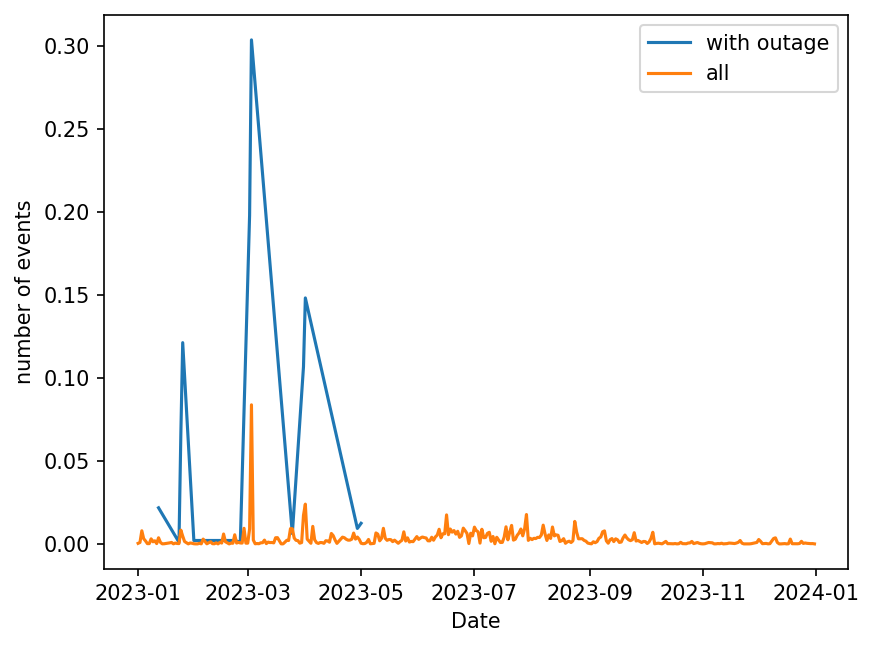

In [11]:
plt.plot(dates_withoutage, counts_withoutage/np.sum(counts_withoutage), label='with outage')
plt.plot(dates_all, counts_all/np.sum(counts_all), label='all')
plt.legend()
plt.xlabel('Date')
plt.ylabel('number of events')

Text(0, 0.5, 'normalized number of events')

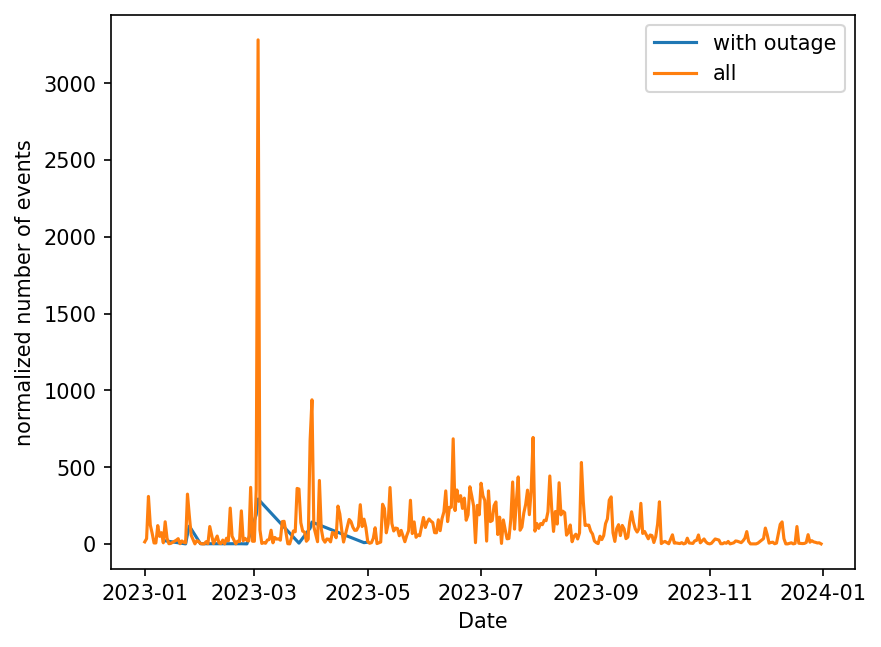

In [12]:
plt.plot(dates_withoutage, counts_withoutage, label='with outage')
plt.plot(dates_all, counts_all, label='all')
plt.legend()
plt.xlabel('Date')
plt.ylabel('normalized number of events')

# USE MERGED DATA

In [13]:
def read_merged(weather, year):
    return pd.read_csv('../merged/merged_{}_{}.csv.gz'.format(weather, year))


## Lightning

In [14]:
light = read_merged('lightning', 2019)

In [15]:
light.head()

Unnamed: 0       #ZDAY  CENTERLON  CENTERLAT  TOTAL_COUNT        DATE  \
0           0  2019-01-01      -83.4       36.3            1  2019-01-01   
1           1  2019-01-01      -88.5       29.0            2  2019-01-01   
2           2  2019-01-01      -87.2       32.0            1  2019-01-01   
3           3  2019-01-01      -84.2       35.0            1  2019-01-01   
4           4  2019-01-01      -83.6       35.0            1  2019-01-01   

               county      state  power_outage  
0     Grainger County  Tennessee         False  
1  Plaquemines Parish  Louisiana         False  
2       Wilcox County    Alabama         False  
3       Fannin County    Georgia         False  
4        Towns County    Georgia         False

In [16]:
outage = light[light['power_outage']==True]
no_outage = light[light['power_outage']==False]

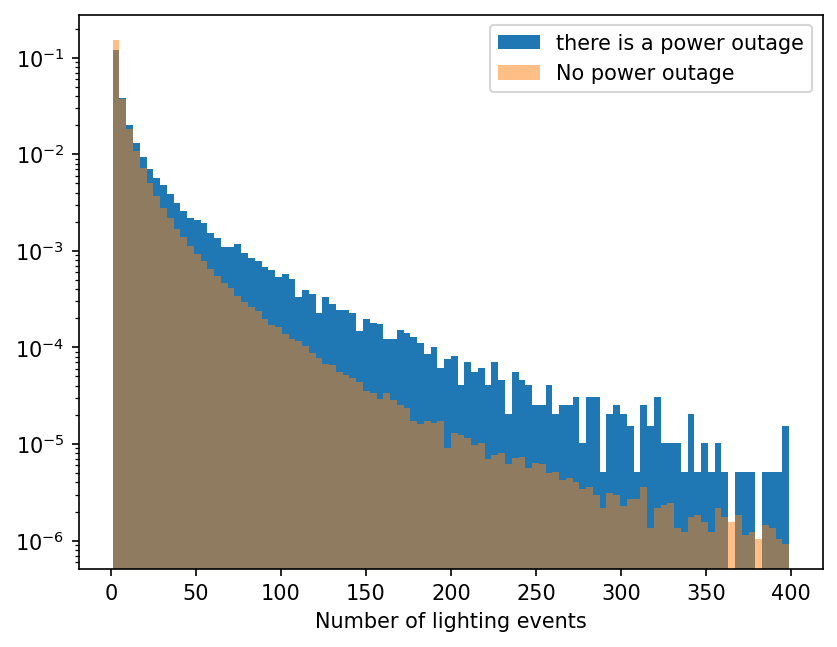

In [17]:
plt.hist(outage[outage['TOTAL_COUNT']<400]['TOTAL_COUNT'], density=True, log=True, bins=100, label='there is a power outage')
plt.hist(no_outage[no_outage['TOTAL_COUNT']<400]['TOTAL_COUNT'],  density=True, log=True, bins=100,label='No power outage', alpha=0.5)
#plt.hist(light[light['TOTAL_COUNT']<40]['TOTAL_COUNT'], density=True, bins=50, label='All', alpha=0.5)
#plt.xlim(0,200)
plt.xlabel('Number of lighting events')
plt.legend()

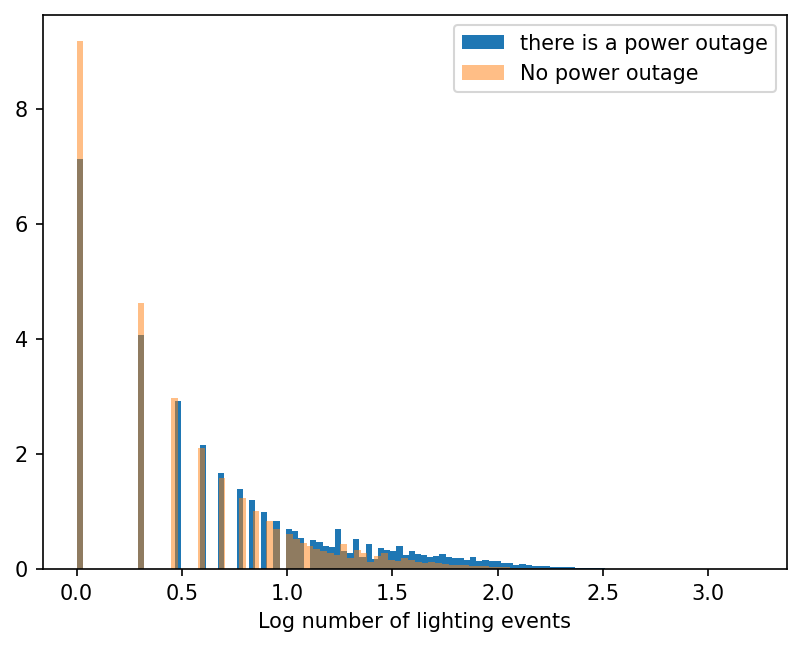

In [18]:
plt.hist(np.log10(outage['TOTAL_COUNT']), density=True, bins=100, label='there is a power outage')
plt.hist(np.log10(no_outage['TOTAL_COUNT']),  density=True, bins=100,label='No power outage', alpha=0.5)
#plt.hist(light[light['TOTAL_COUNT']<40]['TOTAL_COUNT'], density=True, bins=50, label='All', alpha=0.5)
#plt.xlim(0,200)
plt.xlabel('Log number of lighting events')
plt.legend()

## Hail

In [19]:
hail = read_merged('hail', 2019)

In [20]:
hail.head()

Unnamed: 0  index        DATE   LAT_mean    LON_mean  SEVPROB_max  \
0           0      0  2019-01-01  32.593070 -116.090870           20   
1           1      1  2019-01-01  60.499460 -144.926380           10   
2           2      2  2019-01-02  35.041930  -97.930750           10   
3           3      3  2019-01-02  35.050460  -98.002725           30   
4           4      4  2019-01-02  34.957015  -98.064268           40   

   PROB_max  MAXSIZE_max                      county            state  \
0        30          0.5                      Tecate  Baja California   
1        60          0.5  Valdez-Cordova Census Area           Alaska   
2        40          0.5                Grady County         Oklahoma   
3        90          0.5                Grady County         Oklahoma   
4        90          0.5                Grady County         Oklahoma   

   power_outage  
0         False  
1         False  
2         False  
3         False  
4         False

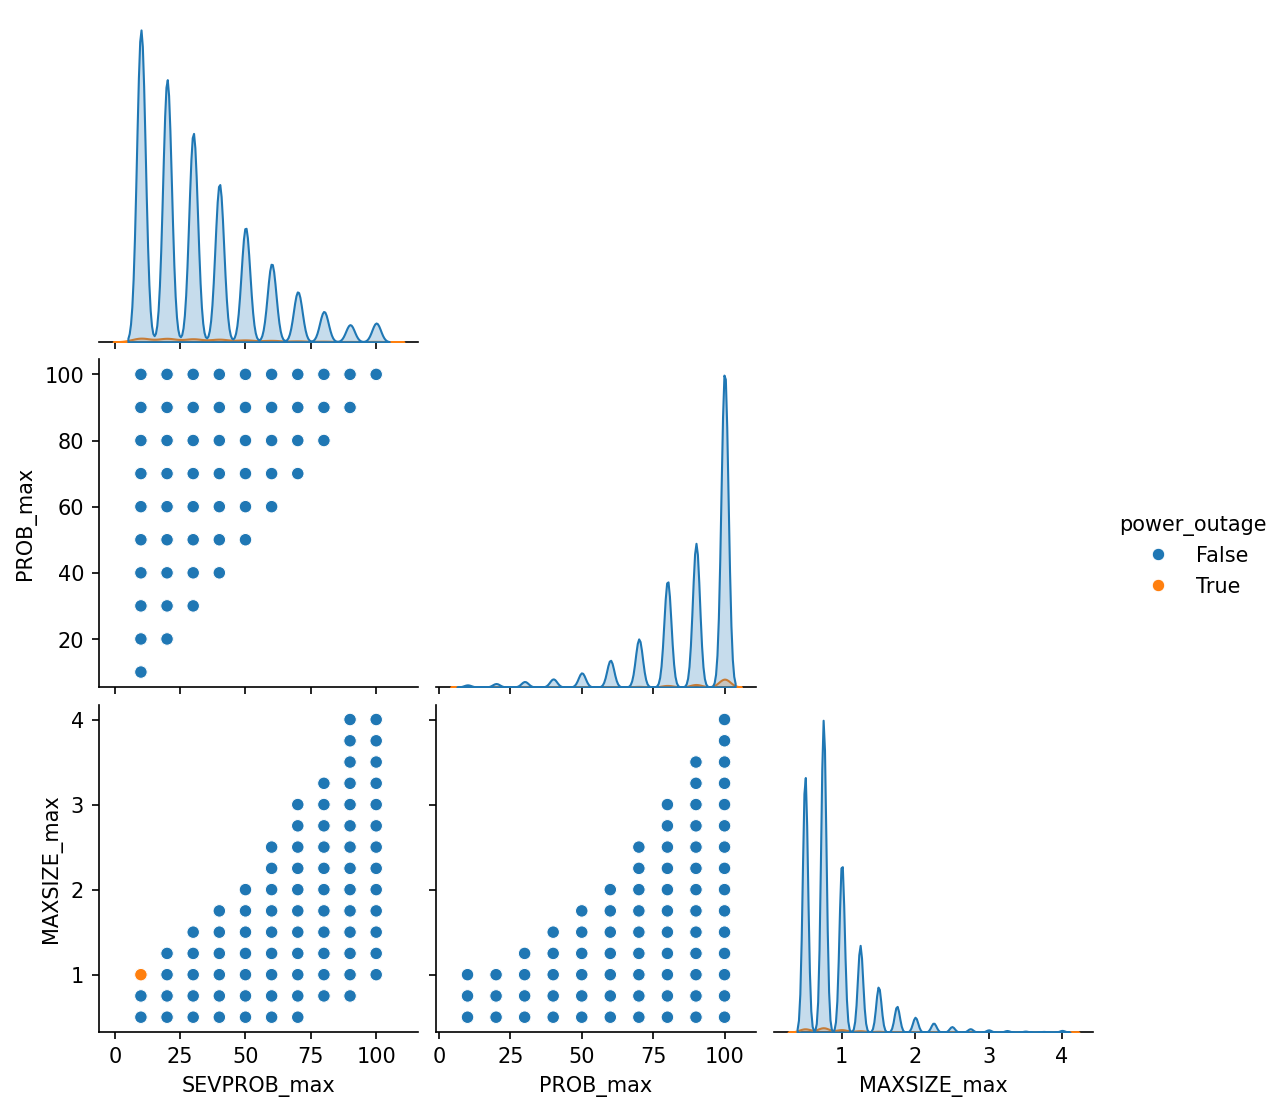

In [21]:
sns.pairplot(hail, x_vars=['SEVPROB_max', 'PROB_max', 'MAXSIZE_max'], y_vars=['SEVPROB_max', 'PROB_max', 'MAXSIZE_max'], hue='power_outage', corner=True)

### Here the problem is that the dataset is unbalanced. Let's try to balance it

### Method1

In [22]:
hail_grouped_by = hail.groupby(['power_outage'])
hail_balanced = hail_grouped_by.apply(lambda x: x.sample(hail_grouped_by.size().min()).reset_index(drop=True))
hail_balanced = hail_balanced.droplevel(['power_outage'])
#hail_balanced

/var/folders/n_/trtxk_px0d1d55c8b8n_7ksr0000gn/T/ipykernel_34356/3863803674.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hail_balanced = hail_grouped_by.apply(lambda x: x.sample(hail_grouped_by.size().min()).reset_index(drop=True))


### Method2

In [23]:
outage = hail[hail['power_outage']==True]
no_outage = hail[hail['power_outage']==False]
no_outage = no_outage.sample(n=len(outage), random_state=290)
hail_balanced = pd.concat([outage, no_outage],axis=0)

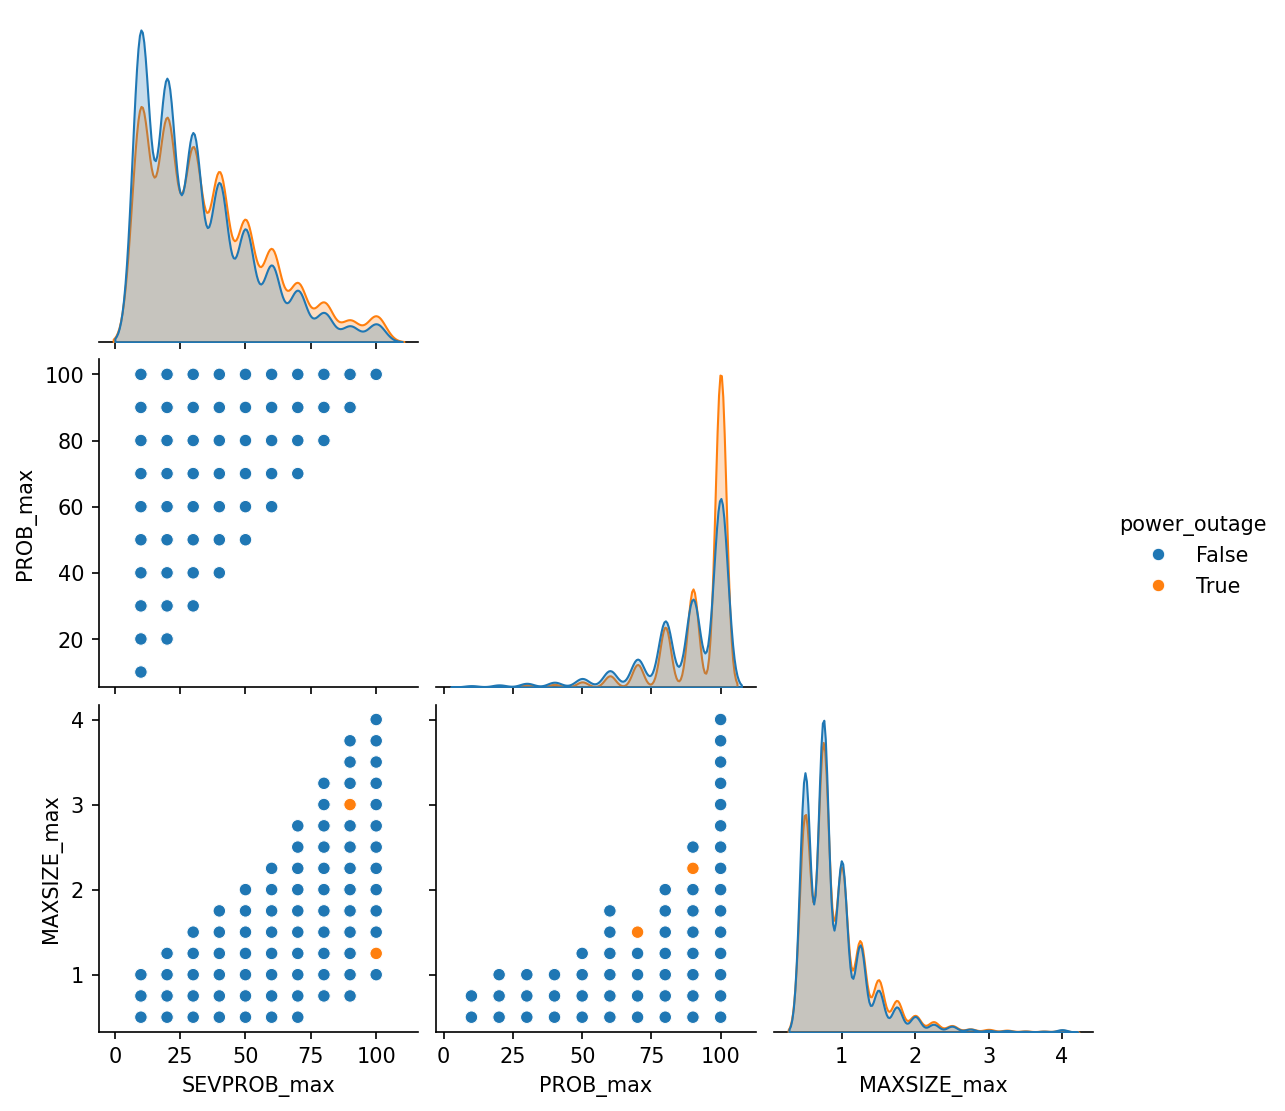

In [24]:
sns.pairplot(hail_balanced, x_vars=['SEVPROB_max', 'PROB_max', 'MAXSIZE_max'], y_vars=['SEVPROB_max', 'PROB_max', 'MAXSIZE_max'], hue='power_outage', corner=True)

# Tornados

In [25]:
tornados = read_merged('tornados', 2019)

In [26]:
tornados.head()

Unnamed: 0        DATE   LAT_mean  LON_mean  AVGDV_max  LLDV_max  MXDV_max  \
0           0  2019-01-01  42.191970 -75.78346         38        62        62   
1           1  2019-01-01  42.193790 -76.14176         35        60        60   
2           2  2019-01-01  42.026670 -76.11920         31        49        52   
3           3  2019-01-01  42.784605 -78.87106         48        55        62   
4           4  2019-01-01  42.897760 -78.87968         42        49        65   

   MXDV_HEIGHT_max  DEPTH_max  MAX_SHEAR_max  MAX_SHEAR_HEIGHT_max  \
0               11        6.8            112                  11.2   
1                9        5.1            128                   9.4   
2               10        6.3             68                  10.3   
3                2        5.9            112                   2.3   
4                9        8.1            146                   9.0   

          county     state  power_outage  
0  Broome County  New York         False  
1   Tioga County  New York         False  
2   Tioga County  New York         False  
3    Erie County  New York         False  
4    Erie County  New York         False

In [27]:
tornados = tornados[(0<=tornados['AVGDV_max'])*(tornados['AVGDV_max']<300)*(tornados['LLDV_max']>=0)*(tornados['MAX_SHEAR_max']<700)]

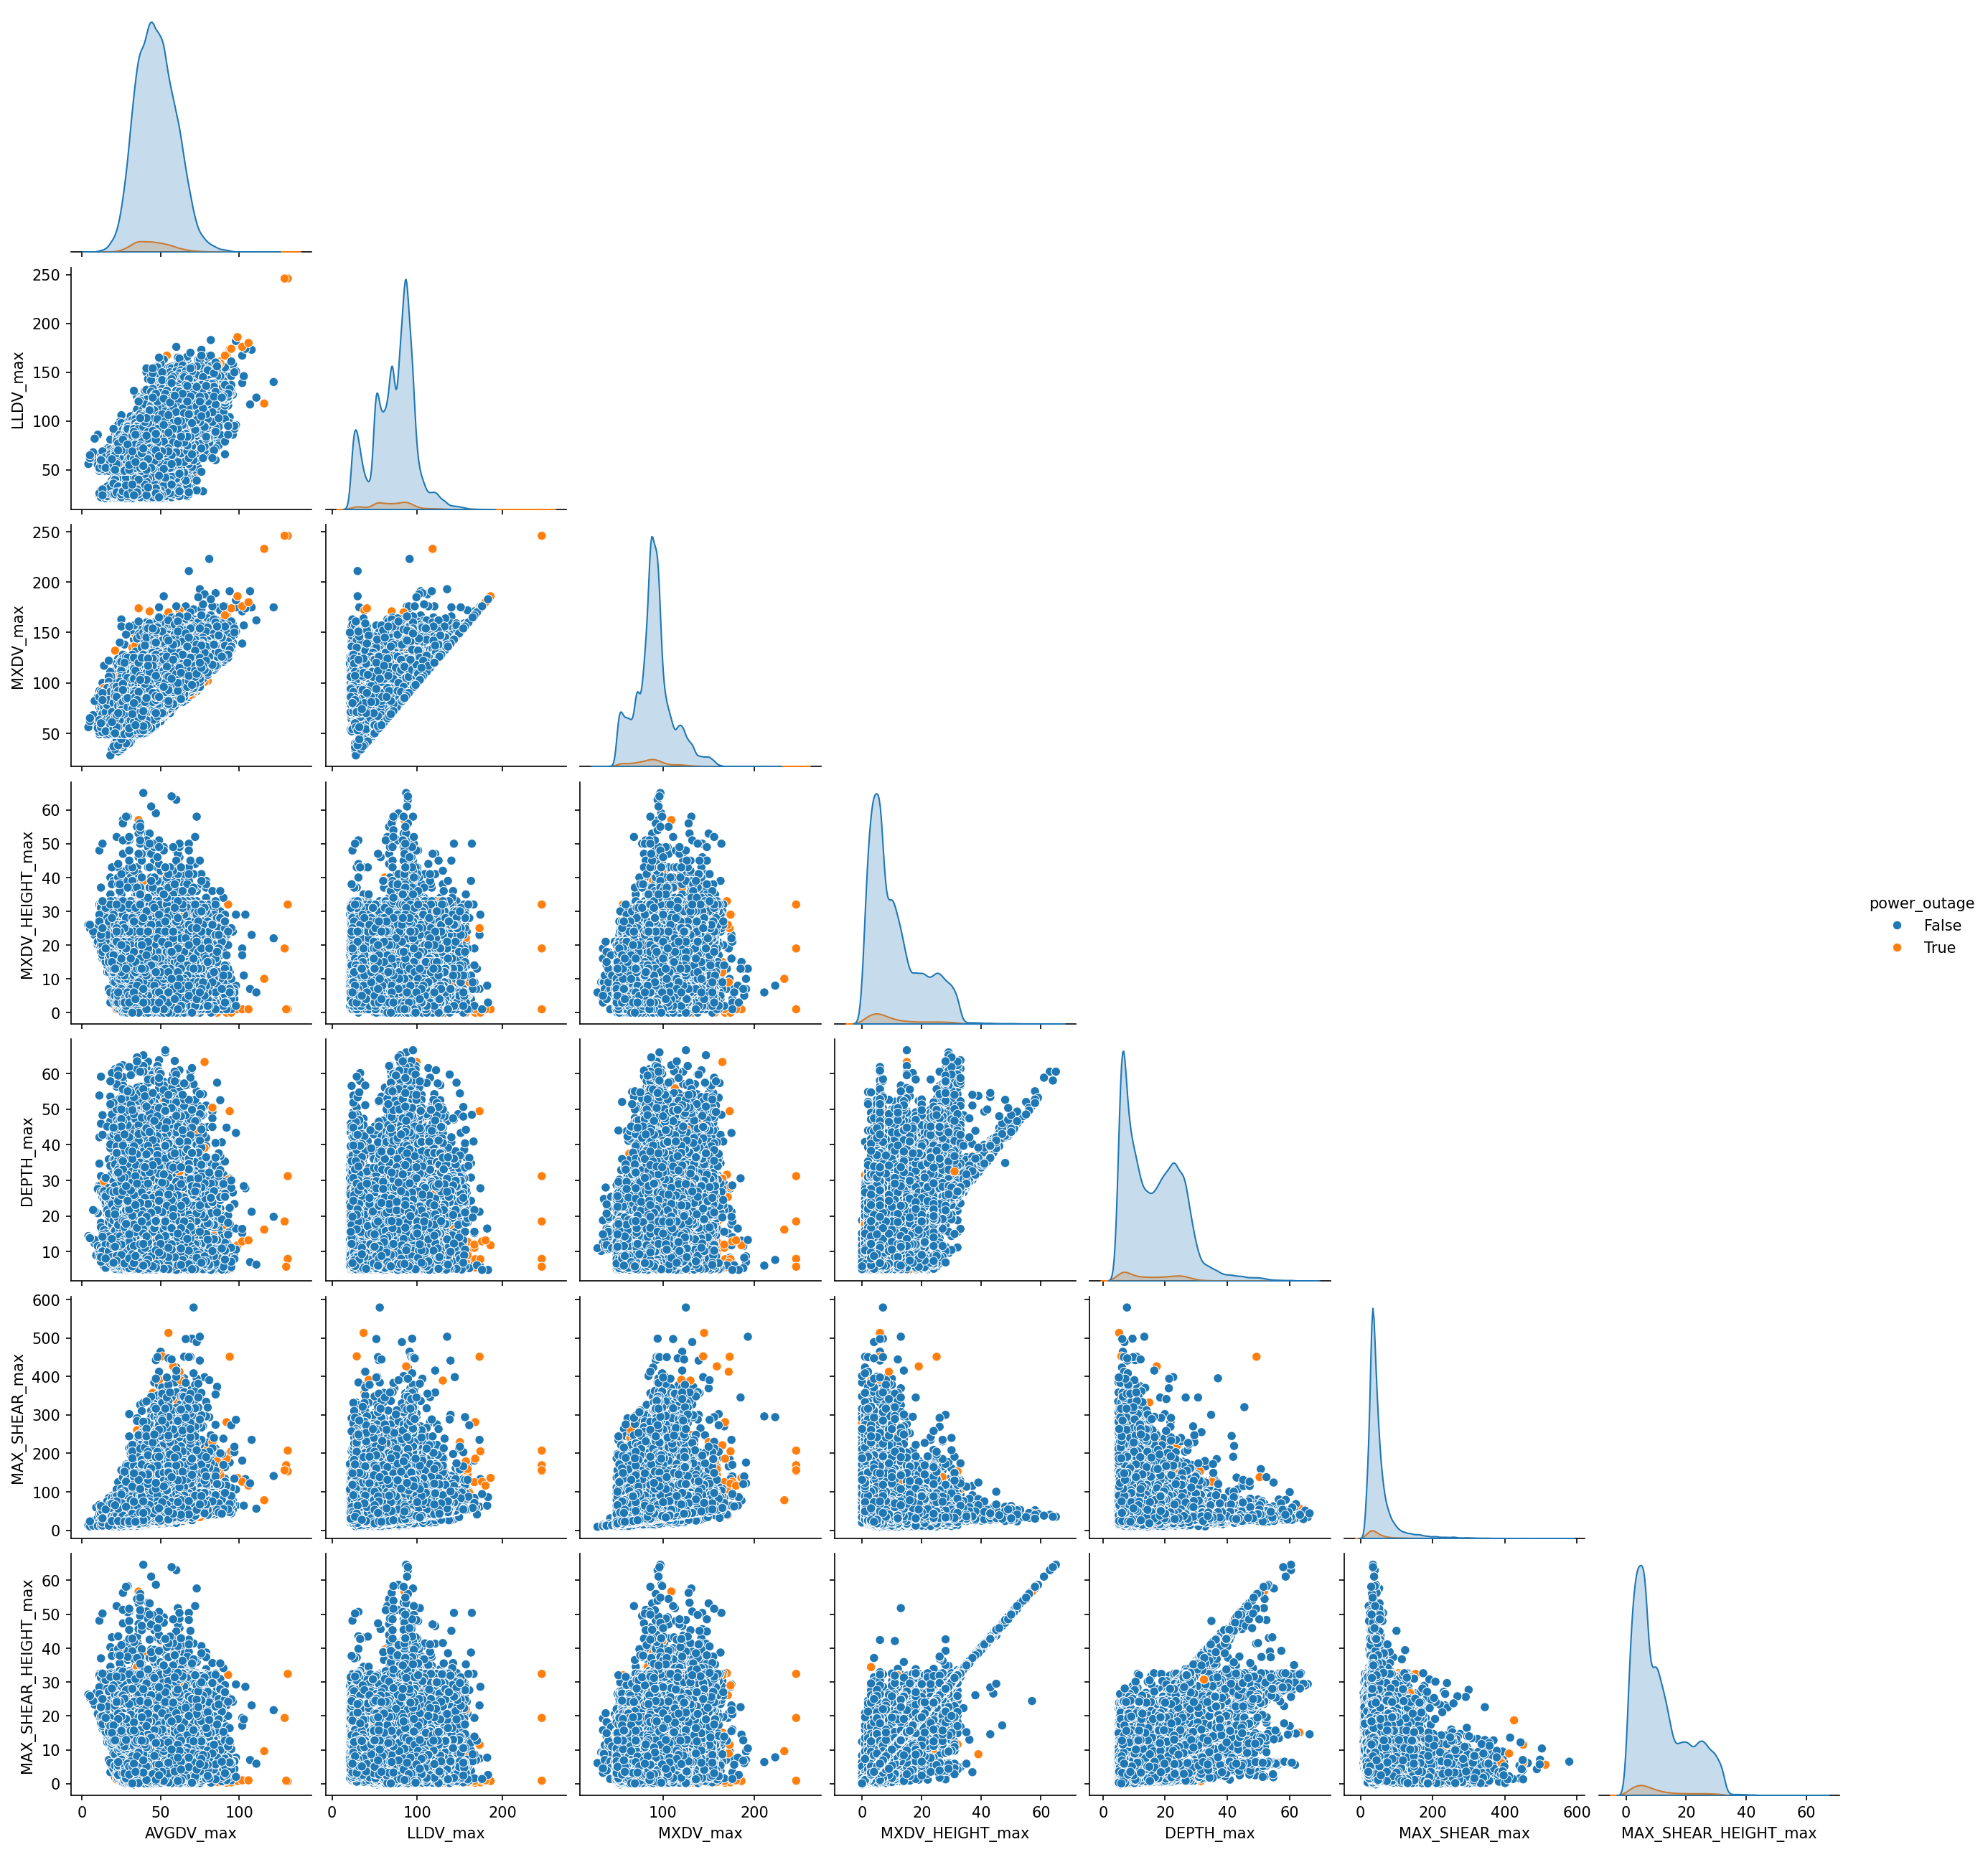

In [28]:
sns.pairplot(tornados, x_vars=['AVGDV_max', 'LLDV_max', 'MXDV_max', 'MXDV_HEIGHT_max', 'DEPTH_max', 'MAX_SHEAR_max','MAX_SHEAR_HEIGHT_max'], y_vars=['AVGDV_max', 'LLDV_max', 'MXDV_max', 'MXDV_HEIGHT_max', 'DEPTH_max', 'MAX_SHEAR_max','MAX_SHEAR_HEIGHT_max'], hue='power_outage', corner=True)

# Storm structure

In [29]:
storm = read_merged('storm', 2019)

In [30]:
storm.head()

Unnamed: 0  index        DATE   LAT_mean    LON_mean  MAX_REFLECT_max  \
0           0      0  2019-01-01  35.625237 -106.501728               38   
1           1      1  2019-01-01  35.385530 -107.268540               32   
2           2      2  2019-01-01  34.944938 -106.137023               34   
3           3      3  2019-01-01  35.469160 -106.943330               32   
4           4      4  2019-01-01  34.870822 -106.253751               39   

   VIL_max  HEIGHT_max             county       state  power_outage  
0        1         5.4    Sandoval County  New Mexico         False  
1        0         4.0      Cibola County  New Mexico         False  
2        0         4.5    Torrance County  New Mexico         False  
3        0         2.1    Sandoval County  New Mexico         False  
4        1         5.6  Bernalillo County  New Mexico         False

In [31]:
cols = ['MAX_REFLECT_max', 'VIL_max', 'HEIGHT_max']

In [32]:
storm['power_outage'].value_counts(normalize=True)

power_outage
False    0.986502
True     0.013498
Name: proportion, dtype: float64

In [33]:
st = storm.sample(frac=0.5)

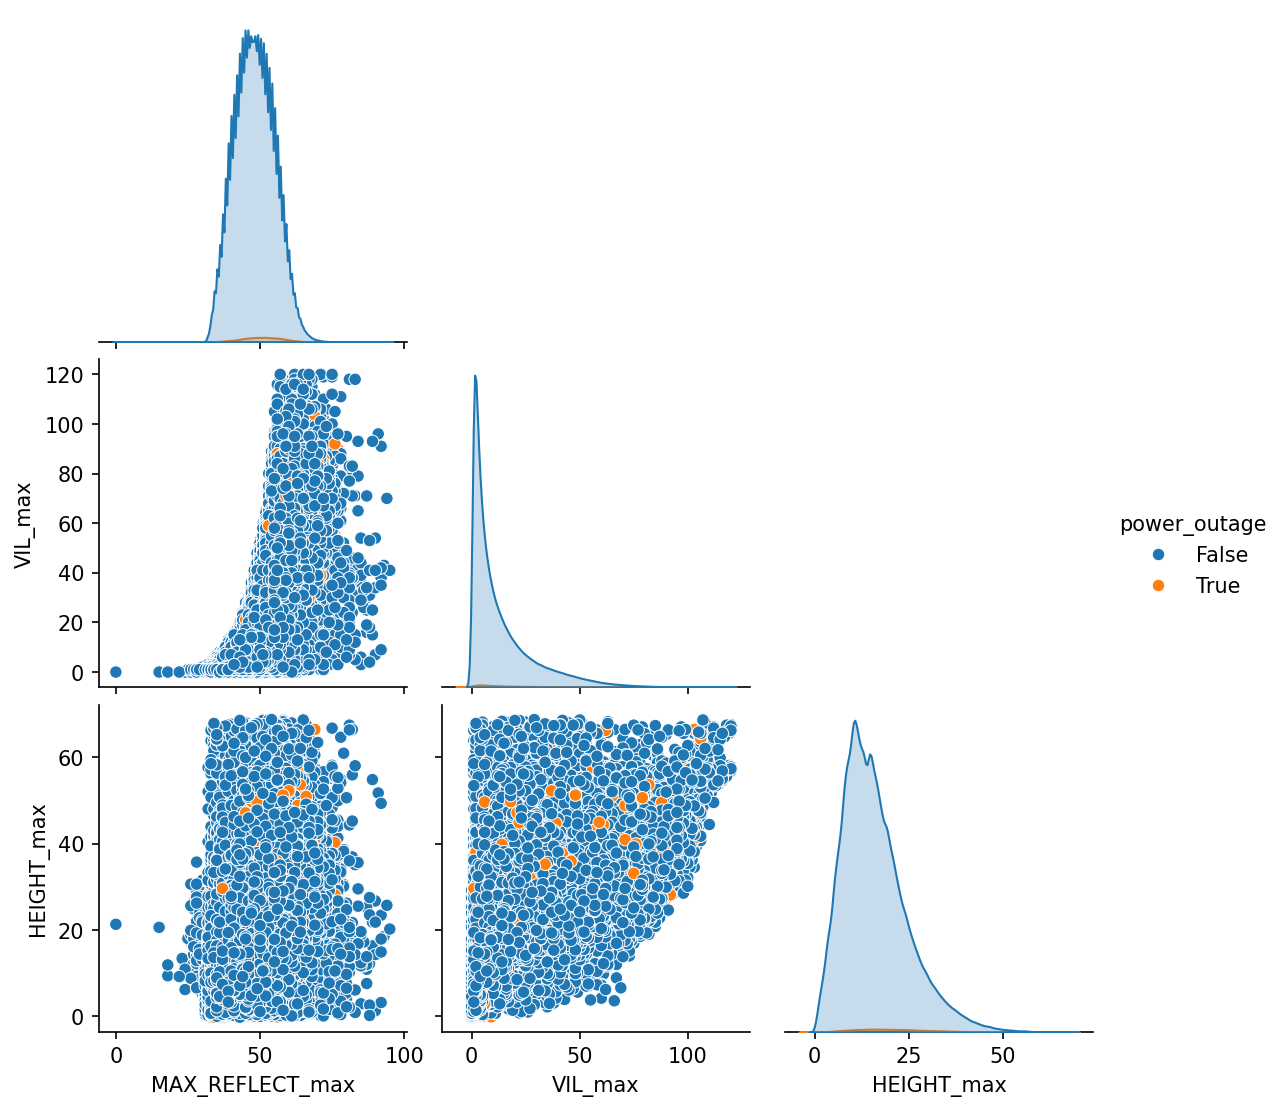

In [34]:
sns.pairplot(st, x_vars=cols, y_vars=cols, hue='power_outage', corner=True)

### Balanced version

In [39]:
structure_grouped_by = storm.groupby(['power_outage'])
structure_balanced = structure_grouped_by.apply(lambda x: x.sample(structure_grouped_by.size().min()).reset_index(drop=True))
structure_balanced = structure_balanced.droplevel(['power_outage'])

/var/folders/n_/trtxk_px0d1d55c8b8n_7ksr0000gn/T/ipykernel_27849/1043288678.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  structure_balanced = structure_grouped_by.apply(lambda x: x.sample(structure_grouped_by.size().min()).reset_index(drop=True))


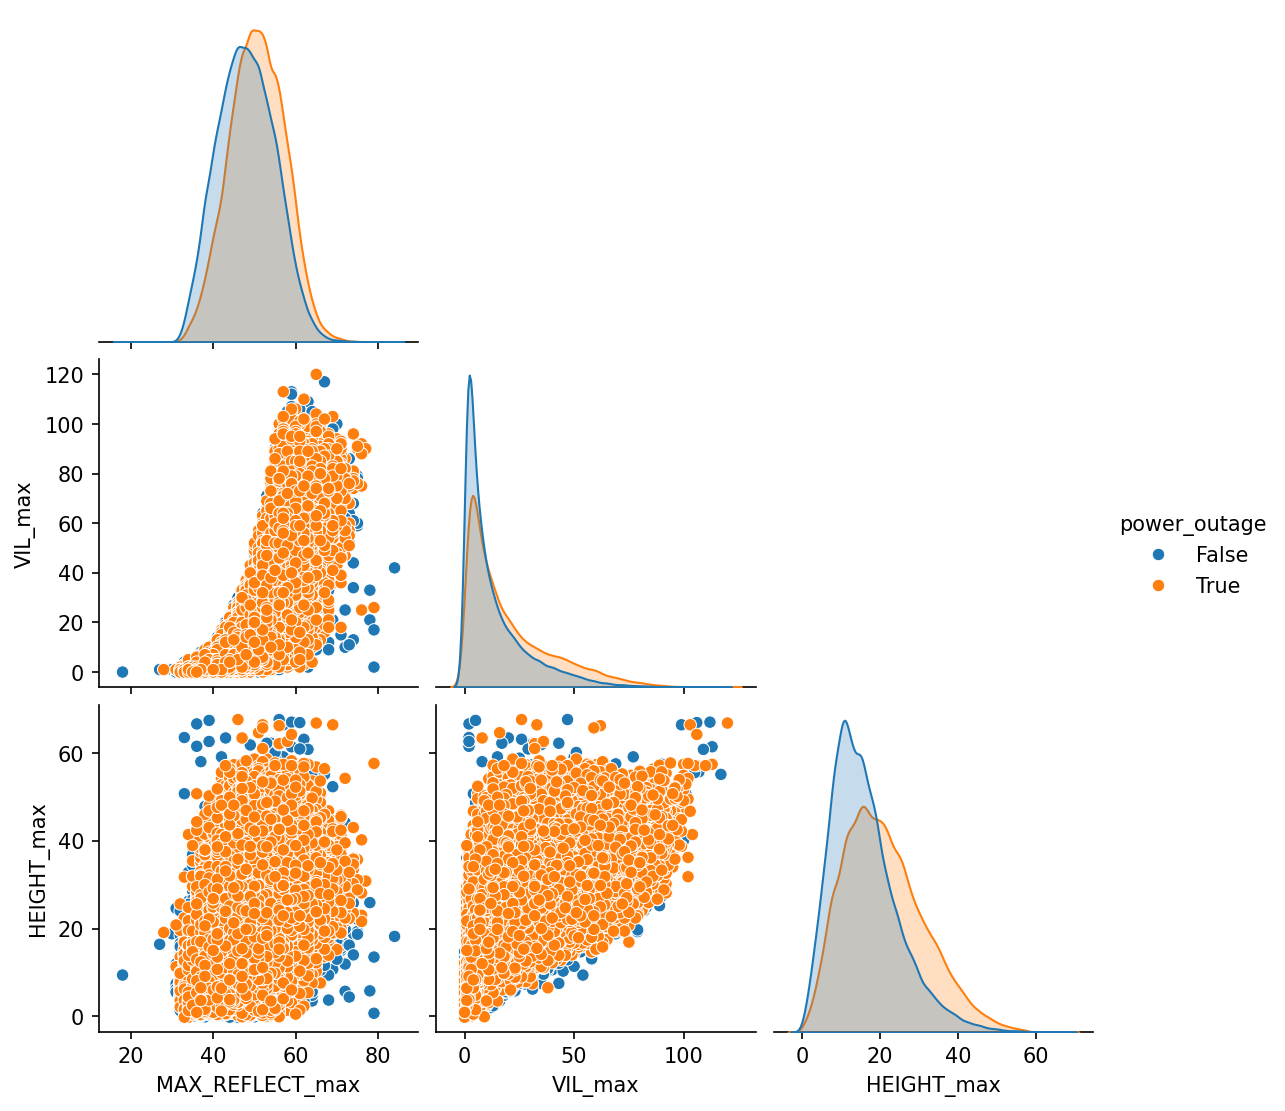

In [40]:
sns.pairplot(structure_balanced, x_vars=cols, y_vars=cols, hue='power_outage', corner=True)